In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
len(y)

150

In [7]:
y !=0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [8]:
X = X[y !=0, :2] # ignoring class 0, only looking at class 1 &2 and grabe the first two colunes of x
y = y[y != 0]

In [9]:
n_sample = len(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [11]:
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

In [22]:
X[:11]

array([[6.8, 2.8],
       [6.3, 3.4],
       [6.9, 3.1],
       [7.6, 3. ],
       [7.2, 3.2],
       [6.8, 3.2],
       [5.6, 3. ],
       [6.3, 2.7],
       [6.5, 3. ],
       [6.7, 3. ],
       [6.3, 2.9]])

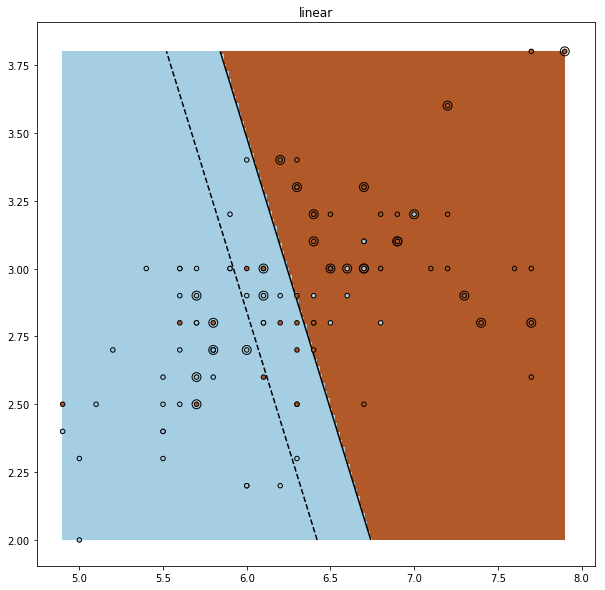

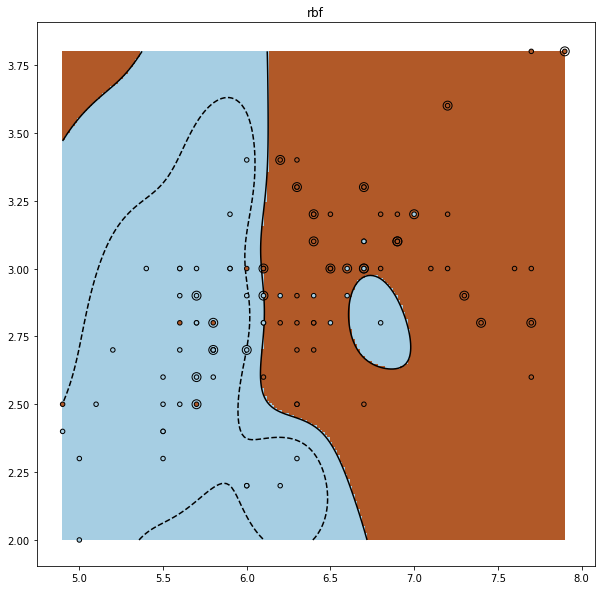

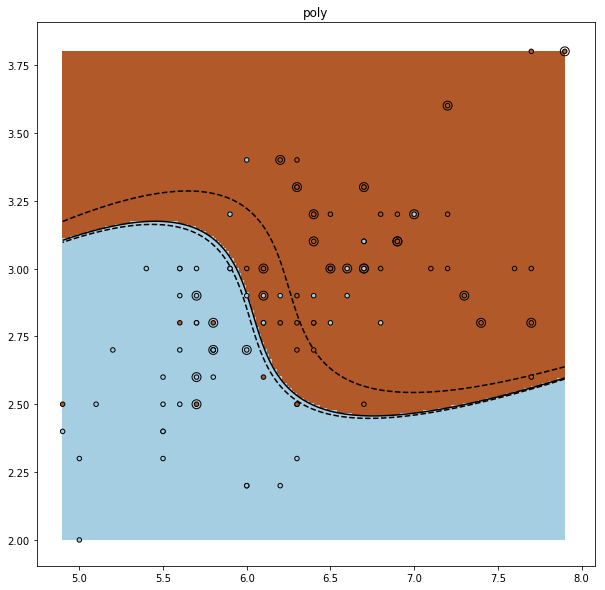

In [21]:
# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10) # SVC is a support Vector Classifer
    clf.fit(X_train, y_train)
    
    plt.figure(figsize=(10,10))
    plt.clf()
    plt.scatter(X[:,0], X[:,1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)
    
    #Circle out the test data 
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
               zorder=10, edgecolor='k')
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a colour plot
    
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k','k','k'],
               linestyles=['--', '-', '--'], levels=[-.5, 0, 5])
    plt.title(kernel)
plt.show()
    
    